# Import Dependencies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(1129)

# Build and Visualize the Graph

In [2]:
G = nx.Graph()
edges = [('1','5'), ('2','5'), ('5','6'), ('3','5'), ('3','6'), ('4','6')]
G.add_edges_from(edges)
G.node['1']['label'] = 'inactive'
G.node['2']['label'] = 'inactive'
G.node['3']['label'] = 'inactive'
G.node['4']['label'] = 'inactive'
G.node['5']['label'] = 'inactive'
G.node['6']['label'] = 'inactive'

In [3]:
node_color=[]
for node_id in G.nodes():
    label = G.node[node_id]['label']
    if label == 'inactive':
        node_color.append('yellow')
    else:
        node_color.append('red')

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 6
Average degree:   2.0000


c:\users\utkar\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


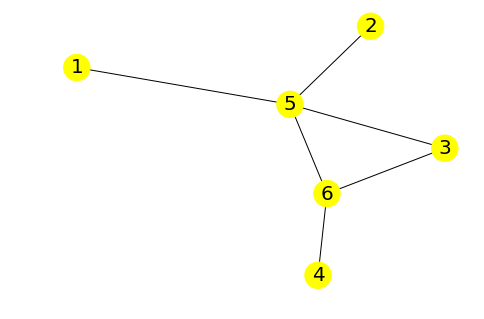

In [4]:
print(nx.info(G))
nx.draw(G, node_size=700, with_labels=True, font_size=20, node_color=node_color)
plt.show()

# Information cascade on independent cascade model

In [8]:
def cascade(seedset, p=0.5):
    # active is a list of lists, where each entry i is the set of nodes activated at the i-th iteration
    activelog = [seedset]
    activeset = set(seedset)
    
    while len(activelog[-1]) > 0:
        new_active = []
        for i in activelog[-1]:
            for neighbor in set(G.neighbors(i)) - activeset:
                if random.random() < p:
                    new_active.append(neighbor)
                    print(i + "->" + neighbor)
                    activeset.add(neighbor)
        print(activelog[-1])
        activelog.append(new_active)
    
    return activeset
    

5->6
['5', '3']
6->4
['6']
['4']


c:\users\utkar\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


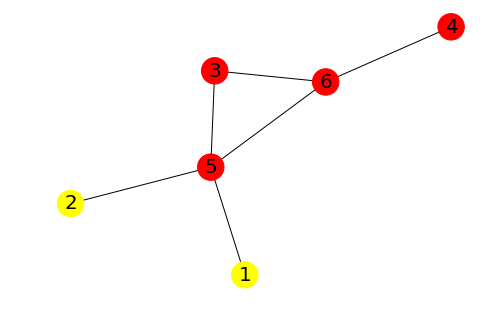

In [13]:
activeset = cascade(['5','3'], p=.5)

node_color=[]
for node_id in G.nodes():
    if node_id in activeset:
        G.node[node_id]['label'] = 'active'
    else:
        G.node[node_id]['label'] = 'inactive'

for node_id in G.nodes():
    label = G.node[node_id]['label']
    if label == 'inactive':
        node_color.append('yellow')
    else:
        node_color.append('red')

# print(nx.info(G))
nx.draw(G, node_size=700, with_labels=True, font_size=20, node_color=node_color)
# plt.show()

If you only could choose one start node to maximize spread, which would you pick and why?

Node 5 as it will have highest chance

If you could add one edge to increase spread, where would you add it and why?

# Susceptible Infected Recovered

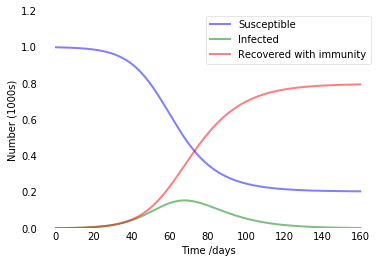

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'g', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'r', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

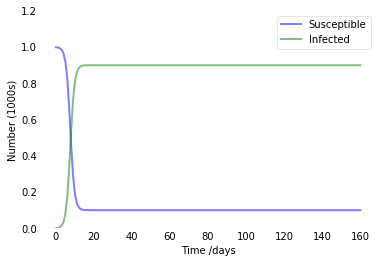

In [23]:
#SIS
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.001, .1 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I = y
    dSdt = gamma * I - beta * I * S
    dIdt = I *(beta*N - gamma) - beta * (I**2)
    return dSdt, dIdt

# Initial conditions vector
y0 = S0, I0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111,axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'g', alpha=0.5, lw=2, label='Infected')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

If the Recovered did not have immunity, how would the graph change over time?